<a href="https://colab.research.google.com/github/bahram3000/test_balancer_app/blob/main/curveuni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
'''x(usdc)=100,100,100,100,100,100,100,100,100
y(paxg)=103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18

sup    =4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397
inf    =3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454
price=4058.28

x(usdc)=96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89
y(paxg)=100,100,100,100,100,100,100,100,100

sup=4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397
inf=3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454'''

'x(usdc)=100,100,100,100,100,100,100,100,100\ny(paxg)=103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18\n\nsup    =4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397\ninf    =3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454\nprice=4058.28\n\nx(usdc)=96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89\ny(paxg)=100,100,100,100,100,100,100,100,100\n\nsup=4171.3118,4171.3118,4171.3118,4171.3118,4171.3118,4146.3601,4121.5577,4096.9036,4072.397\ninf=3952.0454,3975.8278,3999.7533,4023.8227,4048.037,3952.0454,3952.0454,3952.0454,3952.0454'

In [3]:
x1=np.array([100,100,100,100,100,100,100,100,100])
y1=np.sort(np.array([103.55,133.62,188.52,320.71,1080.82,81.06,58.50,35.87,13.18]))

In [4]:
x2=np.sort(np.array([96.56,74.83,53.03,31.17,9.25,123.35,170.93,278.75,758.89]))
y2=np.array([100,100,100,100,100,100,100,100,100])

In [5]:
print(len(x1),len(y1),len(x2),len(y2))

9 9 9 9


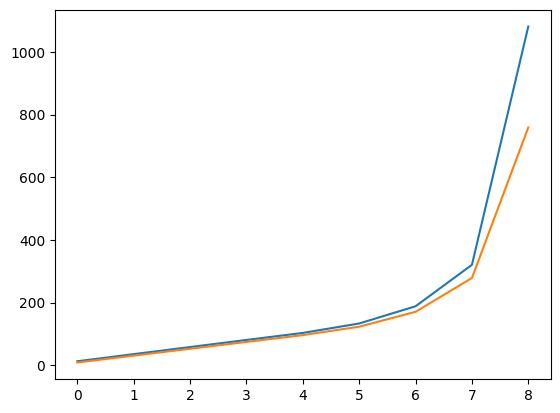

In [6]:
plt.plot(y1)
plt.plot(x2)

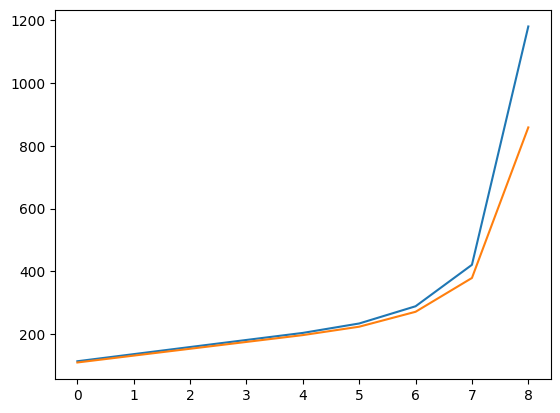

In [7]:
plt.plot(x1+y1)
plt.plot(x2+y2)

In [8]:
def f_1(x,a,b,c,d):
    return a+b*np.exp(c*x+d)

In [9]:
p=curve_fit(f_1,np.arange(9),y1,p0=[48.06950811,0.33576441,1,1])

In [10]:
p[0]

array([66.82247214,  0.1326608 ,  1.24741575, -1.04349258])

In [11]:
y1_fit=f_1(np.arange(9),*p[0])

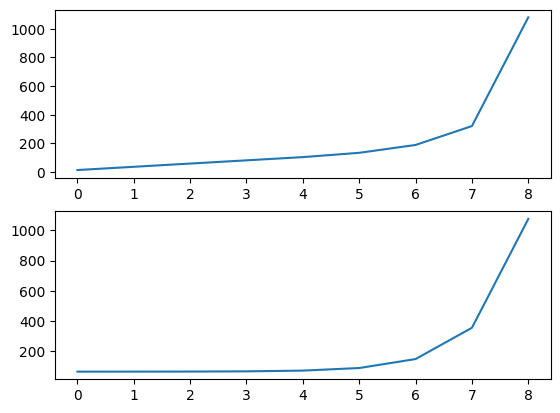

In [12]:
plt.subplot(2,1,1)
plt.plot(y1)
plt.subplot(2,1,2)
plt.plot(y1_fit)

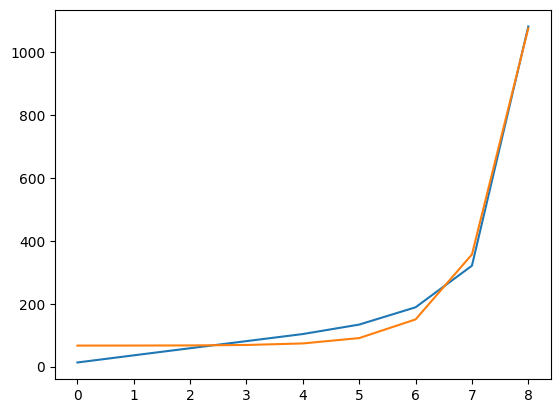

In [13]:
plt.plot(y1)
plt.plot(y1_fit)

In [14]:
y1_fit

array([  66.86919824,   66.98514133,   67.38877804,   68.79397253,
         73.68592481,   90.7164479 ,  150.0053984 ,  356.41007739,
       1074.97384262])

In [15]:
y1

array([  13.18,   35.87,   58.5 ,   81.06,  103.55,  133.62,  188.52,
        320.71, 1080.82])

In [16]:
p2=np.polyfit(np.arange(9),y1,2)

In [17]:
def f2(x,a,b,c):
  return a*x**2+b*x+c

In [18]:
y2_fit=f2(np.arange(9),*p2)

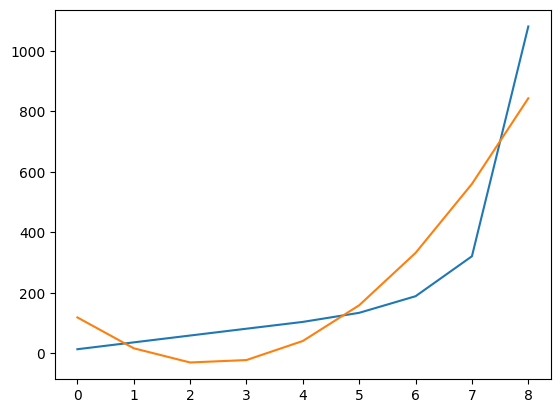

In [19]:
plt.plot(y1)
plt.plot(y2_fit)

In [34]:
def init_calculate_Liquid_amounts(lower,upper,capital):
  init_price=(lower+upper)/2
  s=np.sqrt(init_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=(capital/2)/init_price
  amount_1=capital/2
  l_0=amount_0*s*su/(su-s)
  l_1=amount_1/(s-sl)
  l=min(l_0,l_1)
  return l,amount_0,amount_1

In [35]:
def calculate_new_amounts(current_price,lower,upper,capital):
  l=init_calculate_Liquid_amounts(lower,upper,capital)[0]
  s=np.sqrt(current_price)
  su=np.sqrt(upper)
  sl=np.sqrt(lower)
  amount_0=l*((1/s)-(1/su))
  amount_1=l*(s-sl)
  return amount_0,amount_1

In [36]:
lower=4041.16853
upper=4320.2748
capital=100

In [37]:
init_calculate_Liquid_amounts(lower,upper,capital)

(np.float64(45.94260322006423), 0.01195965768747248, 50.0)

In [41]:
((upper+lower)/2)*init_calculate_Liquid_amounts(lower,upper,capital)[1]

50.0

In [49]:
current_price=4200

In [50]:
calculate_new_amounts(current_price,lower,upper,capital)

(np.float64(0.0099375409591552), np.float64(56.84115929837663))

In [51]:
calculate_new_amounts(current_price,lower,upper,capital)[0]*current_price+calculate_new_amounts(current_price,lower,upper,capital)[1]

np.float64(98.57883132682846)

In [57]:
x_p=np.linspace(start=lower,stop=upper,num=1000)

In [58]:
deposit=[]
for i in x_p:
  cna=calculate_new_amounts(i,lower,upper,capital)
  deposit.append(cna[0]*i+cna[1])

In [60]:
deposit[-1]

np.float64(99.17223091416862)

In [56]:
#deposit

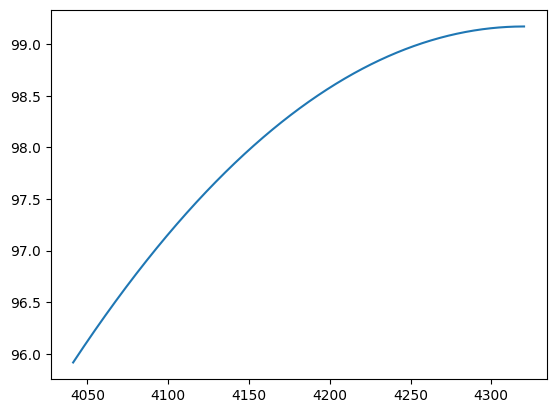

In [59]:
plt.plot(x_p,deposit)
plt.show()

In [61]:
import yfinance as yf

In [62]:
gold_df=yf.download(tickers='GC=F',period='max',interval='1D')

/tmp/ipython-input-1460543229.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_df=yf.download(tickers='GC=F',period='max',interval='1D')
[*********************100%***********************]  1 of 1 completed


In [66]:
closes=gold_df.loc[:,'Close'].values[:,0]

In [67]:
from my_func_pkg import exp_change,mean_exp

In [68]:
ret=exp_change(closes)

In [71]:
eavg=mean_exp(ret)
eavg

np.float64(1.0004267166150027)

In [72]:
fee_apr=1.58

In [75]:
dpr=fee_apr**(1/365)
dpr

1.0012540043657843

In [98]:
x_p2=np.array([lower*(dpr**i) for i in range(30)])
deposit2=[]
hold=[]
all=[]
j=0
for i in x_p2:
  cna=calculate_new_amounts(i,lower,upper,capital)
  deposit2.append(cna[0]*i+cna[1])
  hold.append(((capital/2)+(i/((lower+upper)/2))*(capital/2)))
  all.append((deposit2[j]+(capital*k*(dpr-1))))
  j+=1


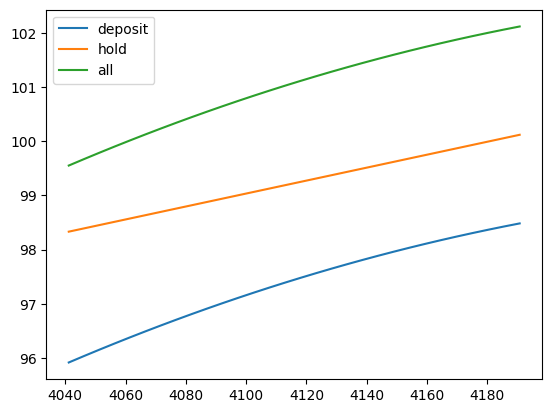

In [100]:
plt.plot(x_p2,deposit2)
plt.plot(x_p2,hold)
plt.plot(x_p2,all)
plt.legend(['deposit','hold','all'])
plt.show()